<a href="https://colab.research.google.com/github/dmb0018/Homework4/blob/main/DavidBryant_Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random    # Used to generate random numbers
import matplotlib.pyplot as plt  # Used to plot
import numpy as np # Used for create numbers

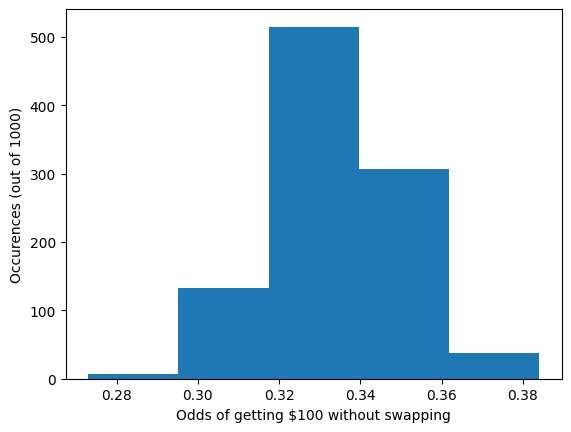

Average odds of getting $100 bill without swapping is:  0.333644


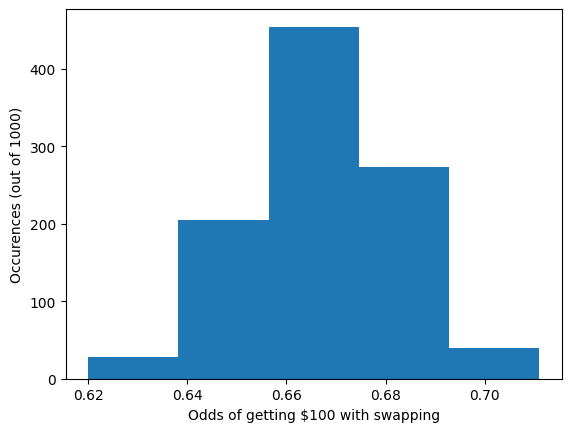

Average odds of getting $100 bill with swapping is:  0.667052


In [2]:

# Array that lists the three possibilities to pick between (two boxes with $10)
# and one box with $100
money = [10,10,100]

# Randomize the seed
random.seed()

# Create values for range
N = 1000
N2 = 1000

# Initiallize arrays that values will be added to later
oddsOfRightWithoutSwappingArray = []
oddsOfRightWithSwappingArray = []

#Start of loop
for i in range(N2):

  # Initialize counters
  M = 0               # Holds numbers of time $100 was picked on initial attempt
  M2 = 0              # Holds number of times $100 was picked after switching

  # Loop to go through N times and see how many times $100 is picked on initial
  # attempt
  for p in range(N):
    # Randomly pick between the three options
    x = random.choice(money)

    # Add value to counter if this random pick is $100
    if (x == 100):
      M += 1

  # The expected value of this is around 0.3333
  oddsOfRightWithoutSwapping = M / N

  #Add value for this time through the loop into the array to hold all values
  oddsOfRightWithoutSwappingArray.append(oddsOfRightWithoutSwapping)

  for p in range(N2):
    x2 = random.choice(money)
    # One of the $10 bills was eliminated by your friend, therefore if you drew a
    # $10 bill originally (2/3 chance) then you will switch to the $100 bill as it
    # is the only bill left
    if(x2 == 10):
      M2 += 1

  # The expected value of this is around 0.6667
  oddsOfRightWithSwapping = M2 / N2

  # Add value for this time through the loop into the array to hold all values
  oddsOfRightWithSwappingArray.append(oddsOfRightWithSwapping)

# Plot the histogram of the array for the odds of getting $100 without swapping
plt.hist(oddsOfRightWithoutSwappingArray,bins=5)
plt.xlabel("Odds of getting $100 without swapping")
plt.ylabel("Occurences (out of 1000)")
plt.show()

# Print a statement showing the average of this going through 1000 times
# without swapping each time
print("Average odds of getting $100 bill without swapping is: ", np.mean(oddsOfRightWithoutSwappingArray))

# Plot the histogram of the array for the odds of getting $100 with swapping
plt.hist(oddsOfRightWithSwappingArray,bins =5)
plt.xlabel("Odds of getting $100 with swapping")
plt.ylabel("Occurences (out of 1000)")
plt.show()

# Print a statement showing the average of this going through 1000 times
# swapping each time
print("Average odds of getting $100 bill with swapping is: ", np.mean(oddsOfRightWithSwappingArray))

In [3]:
# seed the pseudorandom number generator
import numpy as np

# Definition monte_carlo_uniform
def monte_carlo_uniform(func, a=0, b=1, n=1000):
  """
  Monte carlo integration with more uniform spread (forced)
  """
  subsets = np.arange(0, n+1, n/10)
  u =np.zeros(n)
  for i in range(10):
    start = int(subsets[i])
    end = int(subsets[i+1])
    u[start:end] = np.random.uniform(low=i/10, high=(i+1)/10, size=end-start)

  np.random.shuffle(u)
  u_func = func(a+(b-a)*u)
  s=((b-a)/n)*u_func.sum()

  return s

In [4]:
# Define the function f(x)
def f(x):
  return x * np.cos(71*x) + np.sin(13*x)

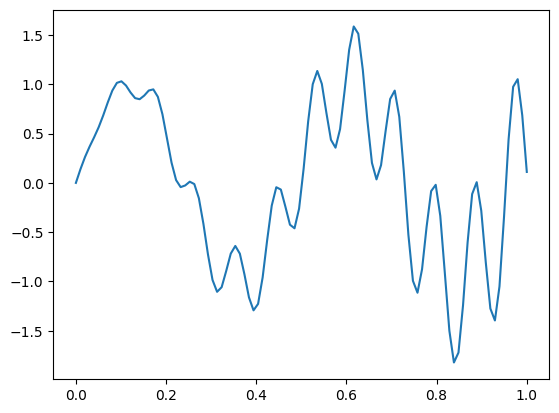

In [5]:
# Create an array of 100 numbers between 0 and 1
x = np.linspace(0,1,100)

# Plot x and the input of the result of f(x)
plt.plot(x,f(x))
pass

In [6]:
# Find direct integral value
from sympy import sin, cos, symbols, integrate
x = symbols('x')
directIntegralValue = integrate(x * cos(71*x) + sin(13*x), (x,0,1)).evalf(6)
print(directIntegralValue)

0.0202549


Average result for numerically determining the integral provided between 0 and 1 is:  0.020219773035800716


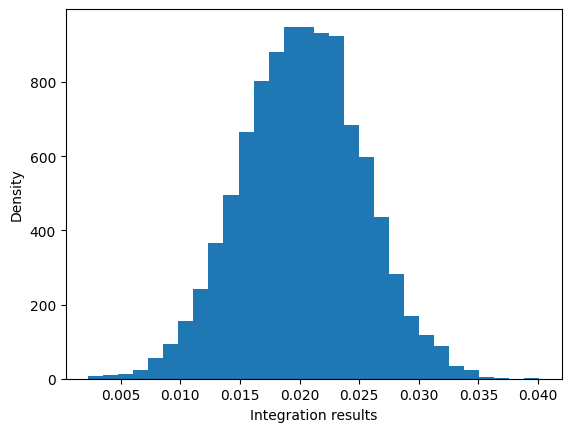

In [7]:
import matplotlib.pyplot as plt
# Initialize array to hold the sample results from the Monte Carlo Simulation
MC_samples=[]
for i in range(10000):
  Y=monte_carlo_uniform(f, a=0, b=1, n=10000)
  # Add each value to the array
  MC_samples.append(Y)

# Plot the array of results
plt.hist(MC_samples, bins=30)  # density=False would make counts
plt.ylabel('Density')
plt.xlabel('Integration results');

# Display the average of these results
professorProvidedFunctionResult = np.mean(MC_samples)
print("Average result for numerically determining the integral provided between 0 and 1 is: ", professorProvidedFunctionResult)

In [10]:
# Code from the book
random.seed(2)

#Define function
f = lambda x: x*cos(71*x) + sin(13*x)

# Initialize bounds and number of steps
a = 0.0
b = 1.0
NumSteps = 10000

# Initialize arrays
XIntegral = []
YIntegral = []
XRectangle = []
YRectangle = []

# Initialize values for ymin and ymax
ymin = f(a)
ymax = ymin

# Loop through each step and replace ymin if new ymin is found and replace
# ymax if new ymax is found
for i in range(NumSteps):
  x = a + (b-a) * float(i)/NumSteps
  y = f(x)
  if y < ymin: ymin = y
  if y > ymax: ymax = y

# Area of the rectangle
A = (b-a) * (ymax - ymin)

# Number of random pairs generated (N) and initialize counter
N = 10000
M = 0

# Create N random pairs
for k in range(N):
  x = a + (b-a) * random.random()
  y = ymin + (ymax - ymin) * random.random()

  # Add to counter if the value obtained is within the area under the function
  if y <= f(x):
    M += 1
    XIntegral.append(x)
    YIntegral.append(y)
  else:
    XRectangle.append(x)
    YRectangle.append(y)

# Determine the numerical integral via the code in the book
NumericalIntegral = M / N * A
print ("Numerical Integration via the code in the book = ", NumericalIntegral)

# Find the difference between the result found earlier with the function from
# professor and the direct integral value and print results
difference = professorProvidedFunctionResult - directIntegralValue
print("")  # To have space between results and help with ease of reading
print("The difference between the direct integral value and the value obtained")
print("via the workflow provided by professor is:", difference)
print("For a percent error of %", abs(difference/directIntegralValue)*100)

# Find the difference between the result found from the code in the books
# and the direct integral value and print results
difference2 = NumericalIntegral - directIntegralValue
print("")  # To have space between results and help with ease of reading

print("The difference between the direct integral value and the value obtained")
print("via the workflow provided by our textbook is:", difference2)
print("For a percent error of %" , abs(difference2/directIntegralValue)*100)

Numerical Integration via the code in the book =  1.86805610963608

The difference between the direct integral value and the value obtained
via the workflow provided by professor is: -3.51667587396888e-5
For a percent error of % 0.173620653018025

The difference between the direct integral value and the value obtained
via the workflow provided by our textbook is: 1.84780116984154
For a percent error of % 9122.71864831514
